# Python_Machine Learning_Pandas_Data Analysis - part 7

##### 데이터 분석 관련 내용을 정리 하였으며, 파이썬 머신러닝 판다스 데이터분석(오승환 지음)을 참고하여 작성하였습니다.
##### 해당 자료는 python 3.7 기반으로 작성되었습니다.

## 7. 머신러닝 데이터 분석
### 7.1 머신러닝 개요
#### - 머신러닝은 해결하려는 문제에 따라 예측, 분류, 군집 알고리증 등으로 분류된다. 
#### - 데이터프레임의 열은 속성을 나타내는 변수들이 위치히고, 데이터프레임의 행은 하나의 관측값을 나타낸다.
#### - train / validate / test

### 7.2 회귀분석
#### 7.2.1 단순회귀분석

    mpg  cylinders  displacement horsepower  weight  accleration  model year  \
0  18.0          8         307.0      130.0  3504.0         12.0          70   
1  15.0          8         350.0      165.0  3693.0         11.5          70   
2  18.0          8         318.0      150.0  3436.0         11.0          70   
3  16.0          8         304.0      150.0  3433.0         12.0          70   
4  17.0          8         302.0      140.0  3449.0         10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
-----------------------------------------------------
    mpg  cylinders  displacement horsepower  weight  accleration  model year  \
0  18.0          8         307.0      130.0  3504.0         12.0          70   
1  15.0          8         350.0      165.0  3693.0         11.5       

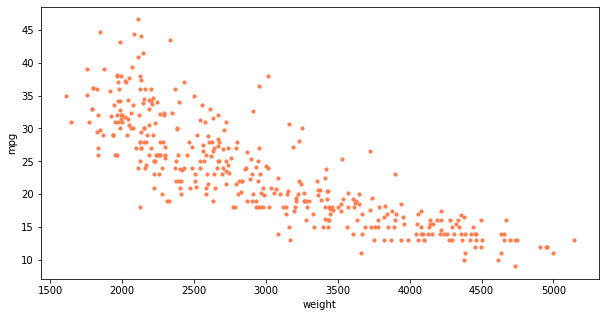

-----------------------------------------------------


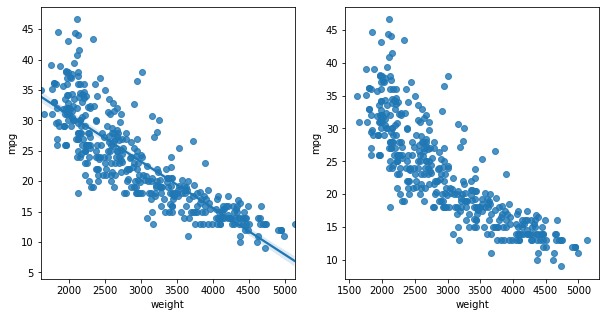

-----------------------------------------------------


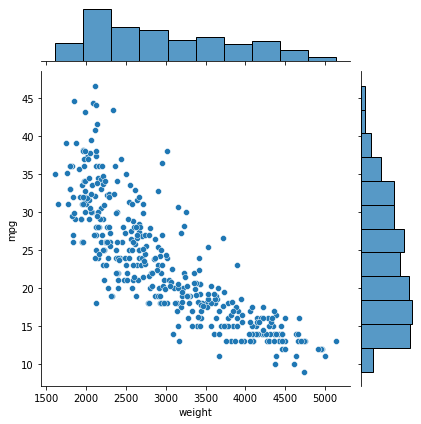

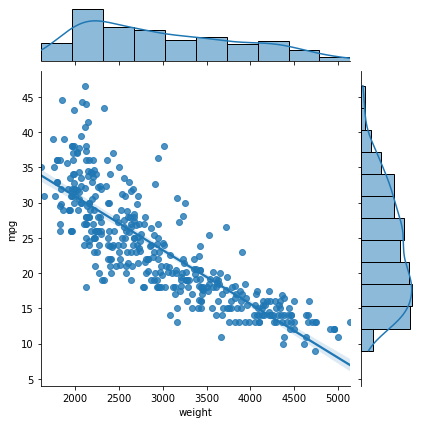

-----------------------------------------------------


In [21]:
# step 1 - 데이터 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/auto-mpg.csv', header = None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'accleration', 'model year', 'origin', 'name']

print(df.head())
print('-----------------------------------------------------')

pd.set_option('display.max_columns', 10) # 출력할 열의 개수 한도 늘리기
print(df.head())
print('-----------------------------------------------------')

In [23]:
# step 2 - 데이터 탐색
print(df.info())
print('-----------------------------------------------------')
print(df.describe())
print('-----------------------------------------------------')
print(df['horsepower'].unique())
print('-----------------------------------------------------')

df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis= 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

print(df.describe())
print('-----------------------------------------------------')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   accleration   392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB
None
-----------------------------------------------------
              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.00

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0
-----------------------------------------------------


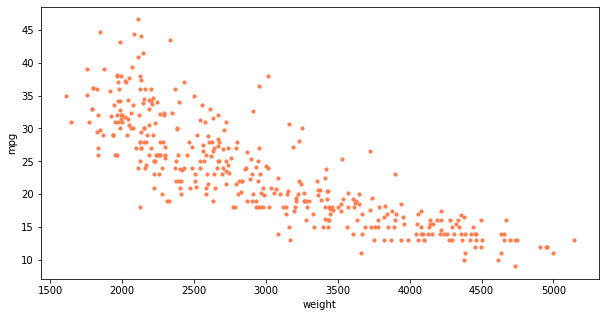

-----------------------------------------------------


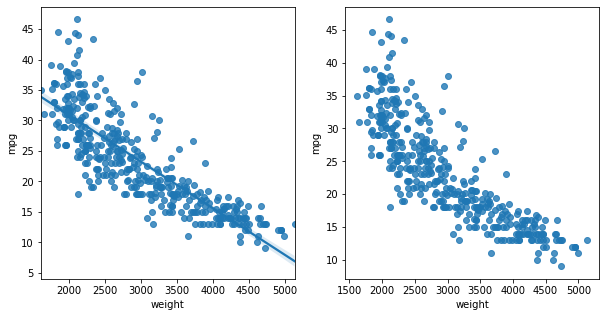

-----------------------------------------------------


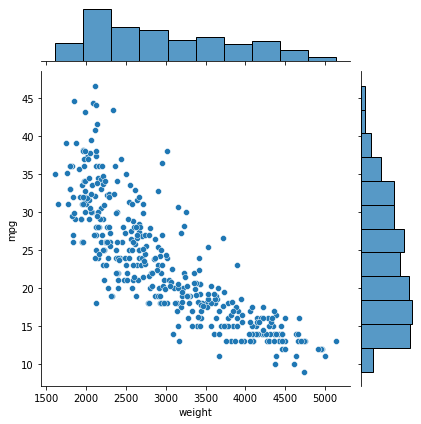

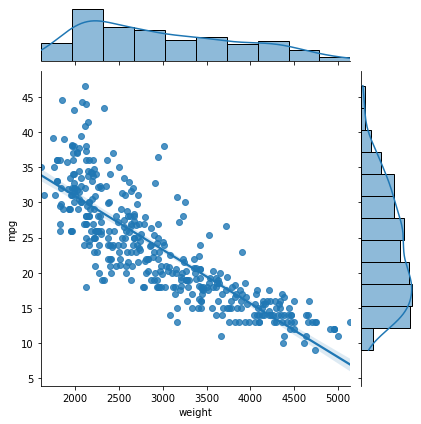

-----------------------------------------------------


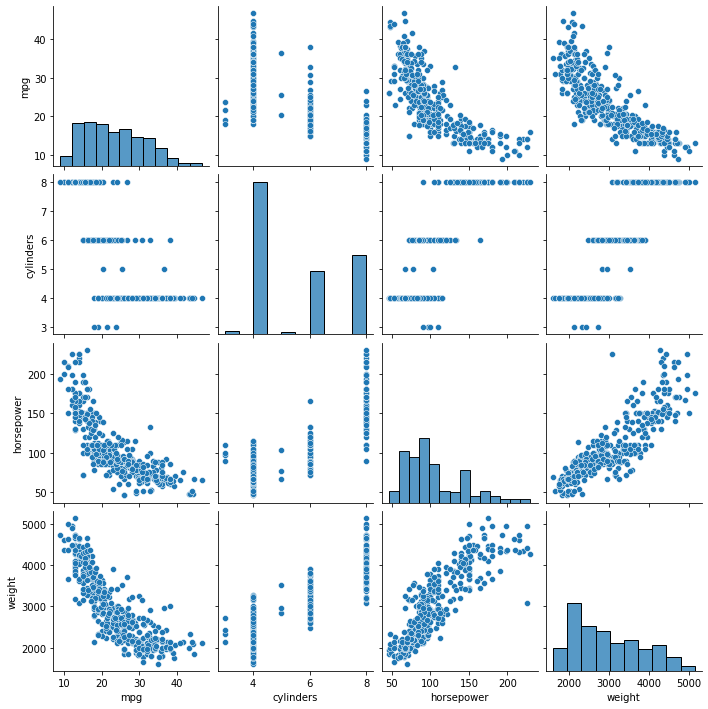

-----------------------------------------------------


In [25]:
# step 3 - 속성 선택
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())
print('-----------------------------------------------------')

ndf.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'coral', s=10, figsize = (10,5))
plt.show()
plt.close()
print('-----------------------------------------------------')

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax1)
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax2, fit_reg = False)
plt.show()
plt.close()
print('-----------------------------------------------------')

sns.jointplot(x = 'weight', y = 'mpg', data = ndf)
sns.jointplot(x = 'weight', y = 'mpg', kind = 'reg', data = ndf)
plt.show()
plt.close()
print('-----------------------------------------------------')

grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()
print('-----------------------------------------------------')

In [27]:
# step 4 - 훈련 / 검증 데이터 분할

X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('train data 개수 : ', len(X_train))
print('-----------------------------------------------------')
print('test data 개수 : ', len(X_test))
print('-----------------------------------------------------')

train data 개수 :  274
-----------------------------------------------------
test data 개수 :  118
-----------------------------------------------------


0.6822458558299325
-----------------------------------------------------
기울기 a:  [-0.00775343]
-----------------------------------------------------
y절편 b:  46.71036625728009
-----------------------------------------------------


/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


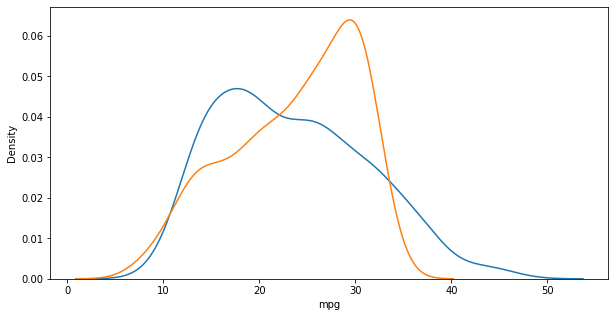

-----------------------------------------------------


In [35]:
# step 5 - 모형 학습 및 검증
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print(r_square)
print('-----------------------------------------------------')
print('기울기 a: ', lr.coef_)
print('-----------------------------------------------------')
print('y절편 b: ', lr.intercept_)
print('-----------------------------------------------------')

y_hat = lr.predict(X)  # predict에는 test만 넣는게 사실 더 정확!

plt.figure(figsize = (10,5))
ax1 = sns.distplot(y, hist=False, label = 'y')
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat', ax = ax1)
plt.show()
plt.close()
print('-----------------------------------------------------')

#### 7.2.2 다항회귀분석

In [7]:
# 데이터 준비 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/auto-mpg.csv', header = None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'accleration', 'model year', 'origin', 'name']

df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis= 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10) 

print("훈련데이터 :", X_train.shape)
print("------------------------------------------------------")
print("검증데이터 :", X_test.shape)
print("------------------------------------------------------")

훈련데이터 : (274, 1)
------------------------------------------------------
검증데이터 : (118, 1)
------------------------------------------------------


In [9]:
# 모형 학습 및 검증
# PolynomialFeatures() - 다항식 변환

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train)

print("원 데이터:", X_train.shape)
print("------------------------------------------------------")
print("2차항 변환 데이터:", X_train_poly.shape)
print("------------------------------------------------------")

pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)
print("------------------------------------------------------")

원 데이터: (274, 1)
------------------------------------------------------
2차항 변환 데이터: (274, 3)
------------------------------------------------------
0.7087009262975685
------------------------------------------------------


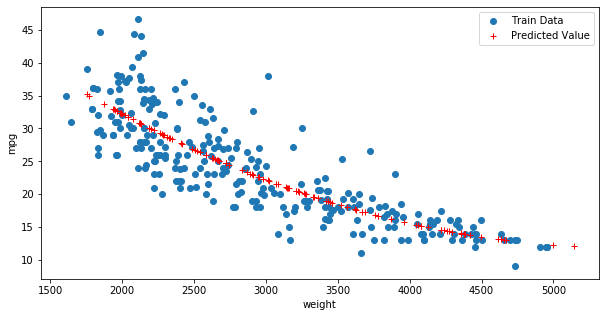

In [10]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label = 'Train Data')
ax.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

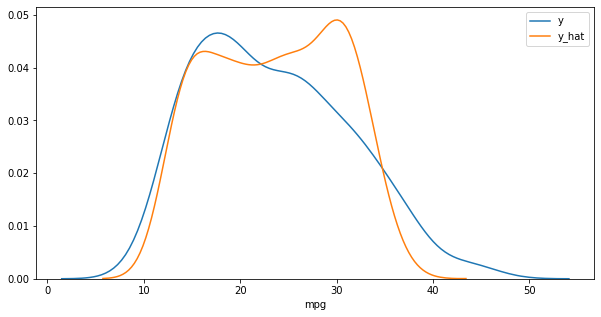

In [12]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize = (10,5))
ax1 = sns.distplot(y, hist = False, label = 'y')
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat', ax = ax1)
plt.show()
plt.close()

#### 7.2.3 다중회귀분석

In [19]:
# 데이터 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/auto-mpg.csv', header = None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'accleration', 'model year', 'origin', 'name']

df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis= 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
X = ndf[['cylinders', 'horsepower','weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10) 

print("훈련데이터 :", X_train.shape)
print("------------------------------------------------------")
print("검증데이터 :", X_test.shape)
print("------------------------------------------------------")

훈련데이터 : (274, 3)
------------------------------------------------------
검증데이터 : (118, 3)
------------------------------------------------------


In [20]:
# 모형 학습 및 검증
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print(r_square)
print("------------------------------------------------------")

print('X 변수의 계수 a :', lr.coef_)
print("------------------------------------------------------")

print('상수항 :', lr.intercept_)
print("------------------------------------------------------")

0.6939048496695597
------------------------------------------------------
X 변수의 계수 a : [-0.60691288 -0.03714088 -0.00522268]
------------------------------------------------------
상수항 : 46.41435126963405
------------------------------------------------------


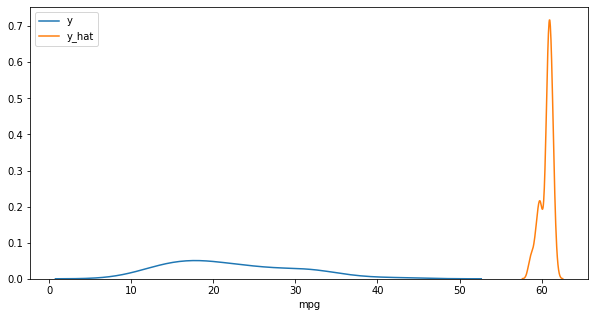

In [21]:
y_hat = pr.predict(X_test)

plt.figure(figsize = (10,5))
ax1 = sns.distplot(y_test, hist= False, label = 'y_test')
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat', ax = ax1)
plt.show()
plt.close()

### 7.3 분류
#### 7.3.1 KNN

In [28]:
# 데이터 준비
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
print(df.head())
print("------------------------------------------------------")

# 데이터 탐색
print(df.info())
print("------------------------------------------------------")

rdf = df.drop(['deck', 'embark_town'], axis = 1)
print(rdf.columns.values)
print("------------------------------------------------------")

rdf = rdf.dropna(subset = ['age'], how = 'any', axis = 0)
print(len(rdf))
print("------------------------------------------------------")

most_freq = rdf['embarked'].value_counts(dropna = True).idxmax() # 최대값(최빈값) 출력
print(most_freq)
print("------------------------------------------------------")

print(rdf.describe(include = 'all'))
print("------------------------------------------------------")

rdf['embarked'].fillna(most_freq, inplace = True)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-nu

In [30]:
# 속성 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp','parch', 'embarked']]
print(ndf.head())
print("------------------------------------------------------")

# 원핫인코딩 - 범주형 데이터를 수치형 데이터로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis = 1) # concat() - 데이터프레임 합치기
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix = 'town') # prefix - 변수명에 접두어 추가
ndf = pd.concat([ndf, onehot_embarked], axis = 1)
ndf.drop(['sex', 'embarked'], axis = 1, inplace = True)
print(ndf.head())
print("------------------------------------------------------")

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S
------------------------------------------------------
   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1
------------------------------------------------------


In [32]:
# 훈련 / 검증 데이터 분할
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]
y = ndf['survived']

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(X).transform(X) # 정규화(normalization)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('train data 개수 :', X_train.shape)
print("------------------------------------------------------")
print('test data 개수 :', X_test.shape)
print("------------------------------------------------------")

train data 개수 : (499, 9)
------------------------------------------------------
test data 개수 : (215, 9)
------------------------------------------------------


In [36]:
# 모형 학습 및 검증
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # k = 5인 knn
knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

print(y_hat[:10])
print("------------------------------------------------------")
print(y_test.values[:10])
print("------------------------------------------------------")

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat) # confusion_matrix
print(knn_matrix)
print("------------------------------------------------------")
knn_report = metrics.classification_report(y_test, y_hat) # 분류 성능 지표 출력
print(knn_report)
print("------------------------------------------------------")

[0 0 1 0 0 1 0 1 0 0]
------------------------------------------------------
[0 0 1 0 0 1 1 1 0 0]
------------------------------------------------------
[[111  14]
 [ 29  61]]
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       125
           1       0.81      0.68      0.74        90

    accuracy                           0.80       215
   macro avg       0.80      0.78      0.79       215
weighted avg       0.80      0.80      0.80       215

------------------------------------------------------


#### 7.3.2 SVM

In [37]:
# 데이터 준비
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')

# 데이터 탐색
rdf = df.drop(['deck', 'embark_town'], axis = 1)
rdf = rdf.dropna(subset = ['age'], how = 'any', axis = 0)
most_freq = rdf['embarked'].value_counts(dropna = True).idxmax()
rdf['embarked'].fillna(most_freq, inplace = True)

# 속성 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp','parch', 'embarked']]
# 원핫인코딩 - 범주형 데이터를 수치형 데이터로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis = 1) # concat() - 데이터프레임 합치기
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix = 'town') # prefix - 변수명에 접두어 추가
ndf = pd.concat([ndf, onehot_embarked], axis = 1)
ndf.drop(['sex', 'embarked'], axis = 1, inplace = True)

# 훈련 / 검증 데이터 분할
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]
y = ndf['survived']

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(X).transform(X) # 정규화(normalization)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('train data 개수 :', X_train.shape)
print("------------------------------------------------------")
print('test data 개수 :', X_test.shape)
print("------------------------------------------------------")

train data 개수 : (499, 9)
------------------------------------------------------
test data 개수 : (215, 9)
------------------------------------------------------


In [38]:
# 모형 학습 및 검증
from sklearn import svm
svm_model = svm.SVC(kernel = 'rbf') # kernel 종류 - rbf(radial basis function), linear, polynimial, sigmoid
svm_model.fit(X_train, y_train)
y_hat = svm_model.predict(X_test)

print(y_hat[:10])
print("------------------------------------------------------")
print(y_test.values[:10])
print("------------------------------------------------------")

[0 0 1 0 1 1 1 1 1 0]
------------------------------------------------------
[0 0 1 0 0 1 1 1 0 0]
------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [41]:
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_hat) # confusion_matrix
print(svm_matrix)
print("------------------------------------------------------")
svm_report = metrics.classification_report(y_test, y_hat) # 분류 성능 지표 출력
print(svm_report)
print("------------------------------------------------------")

[[108  17]
 [ 25  65]]
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       125
           1       0.79      0.72      0.76        90

    accuracy                           0.80       215
   macro avg       0.80      0.79      0.80       215
weighted avg       0.80      0.80      0.80       215

------------------------------------------------------


#### 7.3.3 Decision Tree(의사결정나무)
#### - entropy(복잡도) 값이 낮을수록 분류가 잘 된 것을 의미

In [5]:
# 데이터 준비
import pandas as pd
import numpy as np

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header = None)

df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

print(df.head())
print('--------------------------------------------------------------------------------------------')
print(df.info())
print('--------------------------------------------------------------------------------------------')

print(df.describe())
print('--------------------------------------------------------------------------------------------')

print(df['bare_nuclei'].unique())
print('--------------------------------------------------------------------------------------------')

df['bare_nuclei'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['bare_nuclei'], axis = 0, inplace = True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

print(df.describe())
print('--------------------------------------------------------------------------------------------')

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  
--------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                 699 non-null int64
clump        

In [8]:
X = df[['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']]
y = df['class']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

print('train data 개수: ', X_train.shape)
print('--------------------------------------------------------------------------------------------')
print('test data 개수:, ', X_test.shape)
print('--------------------------------------------------------------------------------------------')

train data 개수:  (478, 9)
--------------------------------------------------------------------------------------------
test data 개수:,  (205, 9)
--------------------------------------------------------------------------------------------


In [10]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)

tree_model.fit(X_train, y_train)

y_hat = tree_model.predict(X_test)

print(y_hat[:10])
print('--------------------------------------------------------------------------------------------')
print(y_test.values[:10])
print('--------------------------------------------------------------------------------------------')

from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)
print('--------------------------------------------------------------------------------------------')

tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)
print('--------------------------------------------------------------------------------------------')

[4 4 4 4 4 4 2 2 4 4]
--------------------------------------------------------------------------------------------
[4 4 4 4 4 4 2 2 4 4]
--------------------------------------------------------------------------------------------
[[127   4]
 [  2  72]]
--------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

--------------------------------------------------------------------------------------------


### 7.4 군집(clustering)
#### 7.4.1 k-Means

In [12]:
# 데이터 준비 
import pandas as pd
import matplotlib.pyplot as plt

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header = 0)

print(df.head())
print('--------------------------------------------------------------------------------------------')

print(df.info())
print('--------------------------------------------------------------------------------------------')

print(df.describe())
print('--------------------------------------------------------------------------------------------')

X = df.iloc[:, :]
print(X[:5])
print('--------------------------------------------------------------------------------------------')

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('--------------------------------------------------------------------------------------------')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
--------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)


In [13]:
# 모형 학습 및 검증
from sklearn import cluster

kmeans = cluster.KMeans(init = 'k-means++', n_clusters=5, n_init=10) # 5개의 그룹
kmeans.fit(X)

cluster_label = kmeans.labels_
print(cluster_label)
print('--------------------------------------------------------------------------------------------')

df['Cluster'] = cluster_label
print(df.head())
print('--------------------------------------------------------------------------------------------')

[0 0 0 0 4 0 0 0 0 3 3 0 4 4 4 0 3 0 4 0 4 0 4 3 4 4 0 0 3 1 4 0 4 4 0 0 4
 3 3 1 4 4 3 3 0 3 3 2 0 3 0 0 1 3 4 0 3 3 0 0 0 2 0 3 0 2 0 4 0 0 4 4 0 4
 0 4 0 3 0 0 0 3 0 4 0 2 2 1 0 4 0 0 3 4 3 0 0 0 0 0 3 3 0 1 0 4 3 3 0 3 0
 3 4 4 4 0 0 0 4 0 4 0 0 0 1 1 4 4 0 1 0 0 4 0 0 0 0 0 0 0 4 4 1 0 4 3 0 0
 0 4 4 0 4 0 0 3 3 4 0 3 0 0 4 3 0 3 0 0 0 0 3 3 0 3 0 3 1 0 0 0 0 1 3 1 0
 0 0 0 3 3 4 0 0 3 0 4 4 0 0 0 3 3 4 0 0 3 0 0 0 3 4 2 0 0 3 3 3 4 3 0 4 0
 0 0 0 0 4 0 0 0 0 0 4 0 4 0 0 4 0 1 4 4 4 0 0 3 0 0 4 0 0 3 0 4 0 4 0 0 1
 1 0 0 4 0 3 3 3 4 3 4 0 0 0 1 0 0 4 0 0 4 0 0 1 4 1 1 0 4 4 1 0 0 0 3 4 0
 4 0 0 0 4 3 0 3 3 3 3 4 0 3 0 4 3 0 0 3 0 0 0 3 0 0 4 0 4 1 0 0 4 0 0 3 4
 2 4 4 0 0 0 0 0 0 0 3 0 0 3 4 0 3 0 3 0 3 4 0 4 3 0 0 4 0 0 0 0 0 0 0 4 0
 1 4 0 4 0 0 3 1 0 0 4 4 4 0 3 0 0 4 0 0 0 0 0 4 0 0 3 0 0 0 0 4 4 4 4 0 4
 3 0 0 0 0 0 0 0 0 3 0 3 0 3 4 4 4 4 0 3 4 0 0 3 0 4 0 4 4 1 3 0 0]
--------------------------------------------------------------------------------------------
   Channel  Re

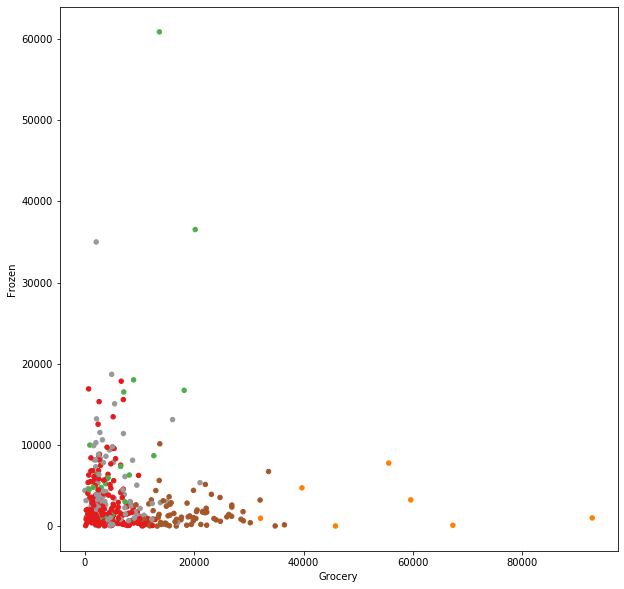

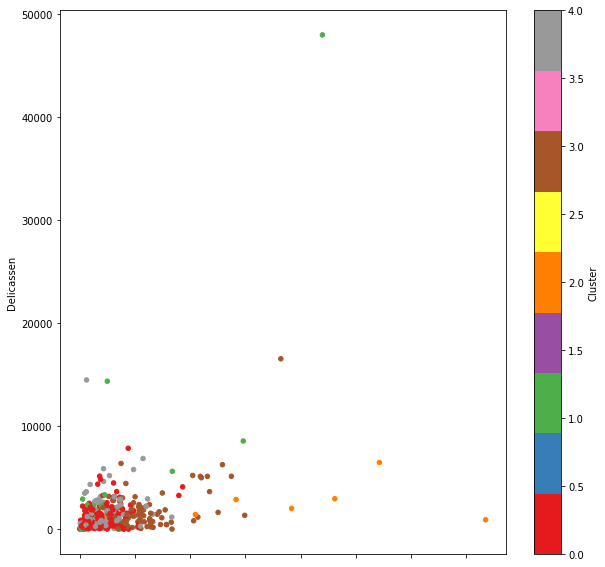

In [14]:
df.plot(kind = 'scatter', x='Grocery', y='Frozen', c='Cluster', cmap = 'Set1', colorbar = False, figsize = (10,10))
df.plot(kind = 'scatter', x='Milk', y='Delicassen', c='Cluster', cmap = 'Set1', colorbar = True, figsize = (10,10))
plt.show()
plt.close()

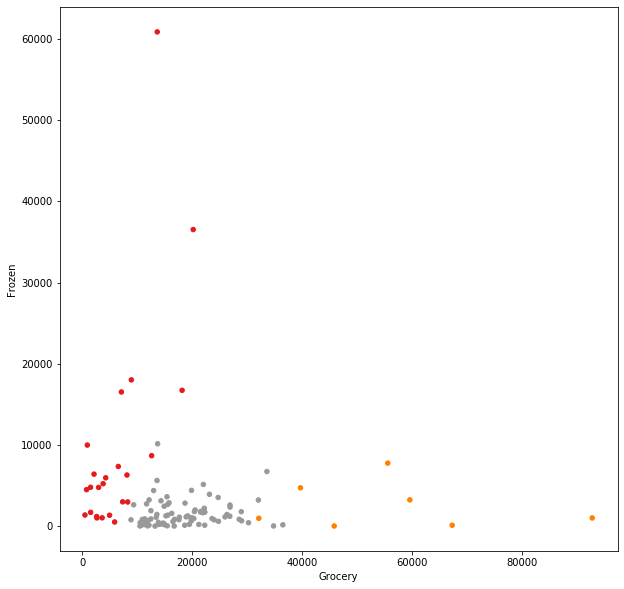

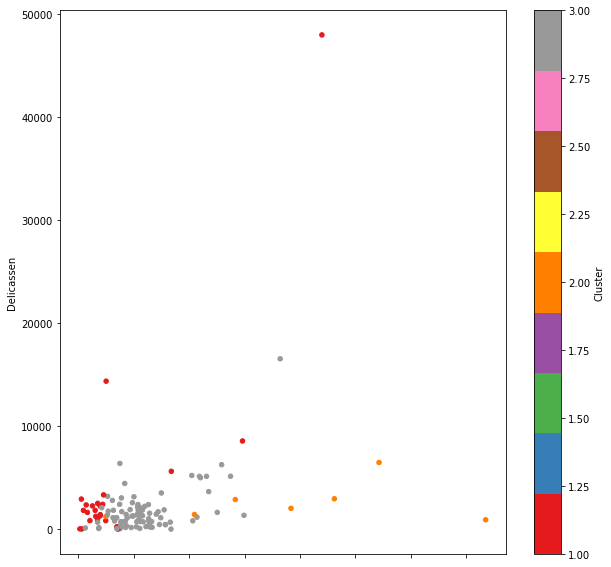

In [15]:
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4) # 큰 값으로 구성된 클러스터 0과 4를 제외 
ndf = df[~mask]

ndf.plot(kind = 'scatter', x='Grocery', y='Frozen', c='Cluster', cmap = 'Set1', colorbar = False, figsize = (10,10))
ndf.plot(kind = 'scatter', x='Milk', y='Delicassen', c='Cluster', cmap = 'Set1', colorbar = True, figsize = (10,10))
plt.show()
plt.close()

#### 7.4.2 DBSCAN
#### - 데이터가 위치하고 있는 공간 밀집도를 기준으로 클러스터를 구분 
#### - 자기를 중심으로 반지름 R의 공간에 최소 M개의 포인트가 존재하는 점을 코어 포인트(core point)라고 부른다. 
#### - 코어 포인트는 아니지만 반지름 R 안에 다른코어 포인트가 있을 경우 경계 포인트(border point)라고 한다. 
#### - 코어포인트도 아니고 경계 포인트로 속하지 않는 점을 Noise(Outlier)라고 분류한다. 
#### - 실제 활용도는 높지 않다고 판단하여 따로 정리하지는 않겠다. 